# Multi-Paulis

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `MultiTargetCNOT`
Implements single control, multi-target $C[X^{\otimes n}]$ gate.

Implements $|0><0| I + |1><1| X^{\otimes n}$ using a circuit of depth $2\log(n) + 1$
containing only CNOT gates.

#### References
 - [Trading T-gates for dirty qubits in state preparation and unitary synthesis](https://arxiv.org/abs/1812.00954). Appendix B.1.


In [2]:
from qualtran.bloqs.mcmt import MultiTargetCNOT

### Example Instances

In [3]:
n = sympy.Symbol('n')
c_multi_not_symb = MultiTargetCNOT(bitsize=n)

In [4]:
c_multi_not = MultiTargetCNOT(bitsize=5)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([c_multi_not_symb, c_multi_not],
           ['`c_multi_not_symb`', '`c_multi_not`'])

### Call Graph

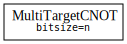

#### Counts totals:
 - `MultiTargetCNOT(bitsize=n)`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
c_multi_not_symb_g, c_multi_not_symb_sigma = c_multi_not_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(c_multi_not_symb_g)
show_counts_sigma(c_multi_not_symb_sigma)

(<Figure size 1000x535.714 with 1 Axes>, <Axes: >)

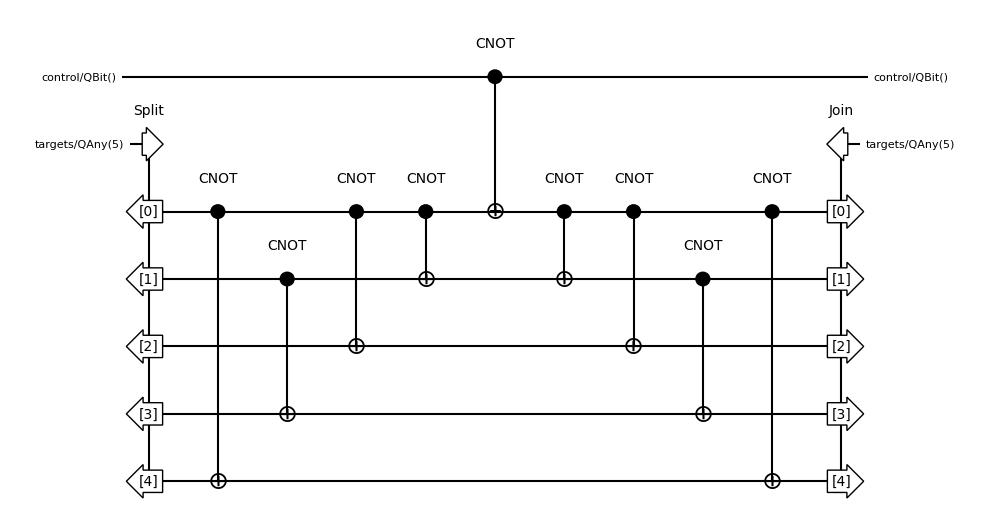

In [7]:
from qualtran.drawing import get_musical_score_data, draw_musical_score

draw_musical_score(get_musical_score_data(c_multi_not.decompose_bloq()))

## `MultiControlPauli`
Implements multi-control, single-target C^{n}P gate.

Implements $C^{n}P = (1 - |1^{n}><1^{n}|) I + |1^{n}><1^{n}| P^{n}$ using $n-1$
clean ancillas using a multi-controlled `AND` gate. Uses the Toffoli ladder
construction described in "n−2 Ancilla Bits" section of Ref[1] but uses an
$\text{AND} / \text{AND}^\dagger$ ladder instead for computing / uncomputing
using clean ancillas instead of the Toffoli ladder. The measurement based
uncomputation of $\text{AND}$ does not consume any magic states and thus has
better constant factors.

#### References
 - [Constructing Large Controlled Nots](https://algassert.com/circuits/2015/06/05/Constructing-Large-Controlled-Nots.html). 


In [8]:
from qualtran.bloqs.mcmt import MultiControlPauli

### Example Instances

In [9]:
ccpauli = MultiControlPauli(cvs=(1, 0, 1, 0, 1), target_gate=cirq.X)

#### Graphical Signature

In [10]:
from qualtran.drawing import show_bloqs
show_bloqs([ccpauli],
           ['`ccpauli`'])

### Call Graph

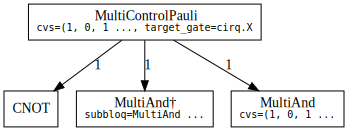

#### Counts totals:
 - `Adjoint(subbloq=MultiAnd(cvs=(1, 0, 1, 0, 1)))`: 1
 - `CNOT()`: 1
 - `MultiAnd(cvs=(1, 0, 1, 0, 1))`: 1

In [11]:
from qualtran.resource_counting.generalizers import ignore_split_join
ccpauli_g, ccpauli_sigma = ccpauli.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(ccpauli_g)
show_counts_sigma(ccpauli_sigma)